In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop



#Load data into pandas dataframe
df = pd.read_csv('../data_v2.csv')
df = df.drop(df.columns[0], 1)
df = df.drop('score', 1)

#Separate class label
X = df[df.columns[:-1]].copy()
y = df[df.columns[-1]].copy()

#Replace binary flags with 0 and 1
X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M' : 0, 'F' : 1})
X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y' : 0, 'N' : 1})
X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y' : 0, 'N' : 1})

#One-hot encode categorical variables
income_onehot = pd.get_dummies(X['NAME_INCOME_TYPE'], prefix='Income')
education_onehot = pd.get_dummies(X['NAME_EDUCATION_TYPE'], prefix='Education')
family_onehot = pd.get_dummies(X['NAME_FAMILY_STATUS'], prefix='Family')
housing_onehot = pd.get_dummies(X['NAME_HOUSING_TYPE'], prefix='Housing')
occasion_onehot = pd.get_dummies(X['OCCUPATION_TYPE'], prefix='Occupation')

X = X.join(income_onehot)
X = X.join(education_onehot)
X = X.join(family_onehot)
X = X.join(housing_onehot)
X = X.join(occasion_onehot)

#Drop original categorical variables
X = X.drop('NAME_INCOME_TYPE', 1)
X = X.drop('NAME_EDUCATION_TYPE', 1)
X = X.drop('NAME_FAMILY_STATUS', 1)
X = X.drop('NAME_HOUSING_TYPE', 1)
X = X.drop('OCCUPATION_TYPE', 1)

X = X.astype('float64')

In [53]:
y.value_counts()

0    36155
1      302
Name: score2, dtype: int64

In [54]:
from imblearn.over_sampling import RandomOverSampler

undersampler10 = RandomOverSampler(sampling_strategy = 0.10)
X_balanced10, y_balanced10 = undersampler10.fit_sample(X, y)

undersampler25 = RandomOverSampler(sampling_strategy = 0.25)
X_balanced25, y_balanced25 = undersampler25.fit_sample(X, y)

undersampler50 = RandomOverSampler(sampling_strategy = 0.50)
X_balanced50, y_balanced50 = undersampler50.fit_sample(X, y)

undersampler100 = RandomOverSampler(sampling_strategy = 1)
X_balanced100, y_balanced100 = undersampler100.fit_sample(X, y)

In [55]:
#10 PERCENT OVERSAMPLING
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_balanced10.to_numpy(), y_balanced10.to_numpy(), test_size=0.30)

model10 = Sequential()

#Hidden Layer 1
model10.add(Dense(24, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Hidden Layer 2
model10.add(Dense(12, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Output Layer
model10.add(Dense(1, activation= 'sigmoid'))

opt = SGD(lr = 0.5, momentum = 0.6)

model10.compile(loss="mean_squared_error", optimizer = opt, metrics=['accuracy'])
metrics10 = model10.fit(X_train, y_train,
                    batch_size=250,
                    epochs=250,
                    validation_data=(X_test, y_test),
                    verbose = 0)

#25 PERCENT OVERSAMPLING
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_balanced25.to_numpy(), y_balanced25.to_numpy(), test_size=0.30)

model25 = Sequential()

#Hidden Layer 1
model25.add(Dense(24, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Hidden Layer 2
model25.add(Dense(12, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Output Layer
model25.add(Dense(1, activation= 'sigmoid'))

opt = SGD(lr = 0.5, momentum = 0.6)

model25.compile(loss="mean_squared_error", optimizer = opt, metrics=['accuracy'])
metrics25 = model25.fit(X_train, y_train,
                    batch_size=250,
                    epochs=250,
                    validation_data=(X_test, y_test),
                    verbose = 0)

#50 PERCENT OVERSAMPLING
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_balanced50.to_numpy(), y_balanced50.to_numpy(), test_size=0.30)

model50 = Sequential()

#Hidden Layer 1
model50.add(Dense(24, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Hidden Layer 2
model50.add(Dense(12, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Output Layer
model50.add(Dense(1, activation= 'sigmoid'))

opt = SGD(lr = 0.5, momentum = 0.6)

model50.compile(loss="mean_squared_error", optimizer = opt, metrics=['accuracy'])
metrics50 = model50.fit(X_train, y_train,
                    batch_size=250,
                    epochs=250,
                    validation_data=(X_test, y_test),
                    verbose = 0)

#100 PERCENT OVERSAMPLING
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_balanced100.to_numpy(), y_balanced100.to_numpy(), test_size=0.30)

model100 = Sequential()

#Hidden Layer 1
model100.add(Dense(24, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Hidden Layer 2
model100.add(Dense(12, input_dim=X_train.shape[1], activation= 'sigmoid', kernel_initializer="glorot_normal"))

#Output Layer
model100.add(Dense(1, activation= 'sigmoid'))

opt = SGD(lr = 0.5, momentum = 0.6)

model100.compile(loss="mean_squared_error", optimizer = opt, metrics=['accuracy'])
metrics100 = model100.fit(X_train, y_train,
                    batch_size=250,
                    epochs=250,
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [56]:
model10.save("CNN_10")
model25.save("CNN_25")
model50.save("CNN_50")
model100.save("CNN_100")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_10\assets
INFO:tensorflow:Assets written to: CNN_25\assets
INFO:tensorflow:Assets written to: CNN_50\assets
INFO:tensorflow:Assets written to: CNN_100\assets


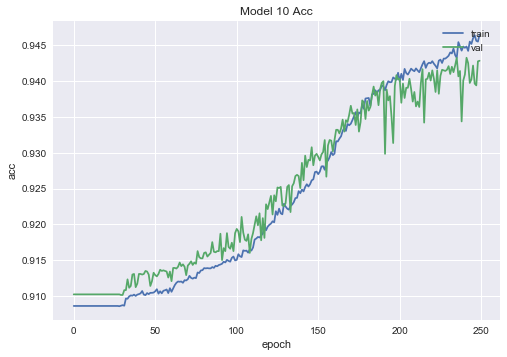

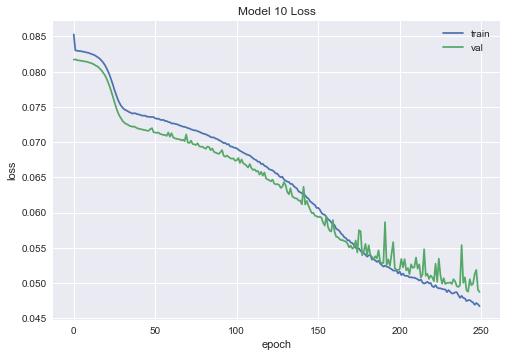

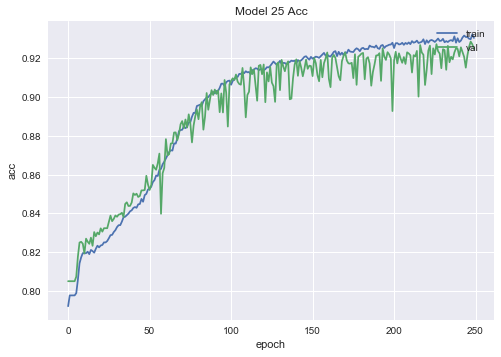

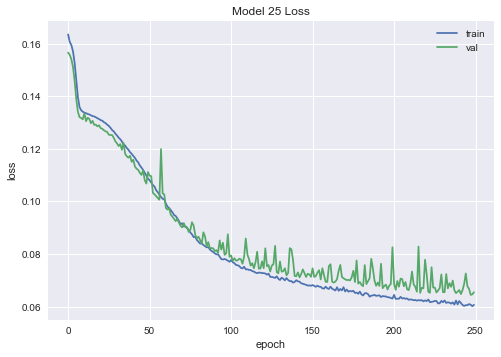

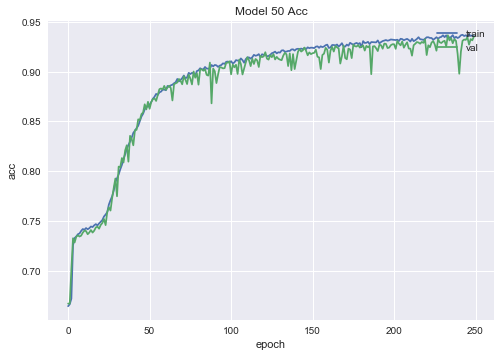

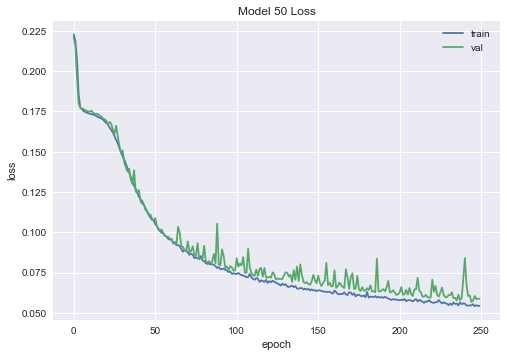

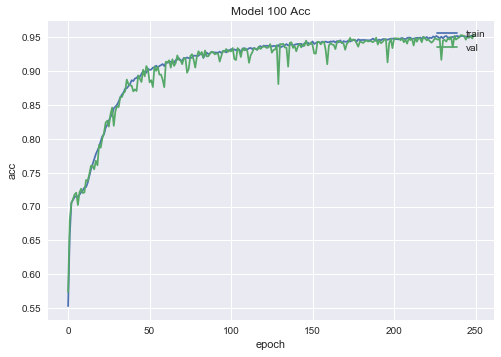

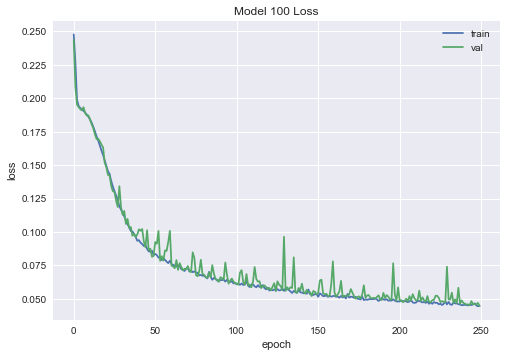

In [57]:
#Model Accuracy Plot
def acc(metrics, num):
    plt.subplot(1, 1, 1)
    plt.plot(metrics.history['accuracy'])
    plt.plot(metrics.history['val_accuracy'])
    plt.title('Model {} Acc'.format(num))
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

#Model Loss Plot
def loss(metrics, num):
    plt.subplot(1, 1, 1)
    plt.plot(metrics.history['loss'])
    plt.plot(metrics.history['val_loss'])
    plt.title('Model {} Loss'.format(num))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

acc(metrics10, 10)
loss(metrics10, 10)

acc(metrics25, 25)
loss(metrics25, 25)

acc(metrics50, 50)
loss(metrics50, 50)

acc(metrics100, 100)
loss(metrics100, 100)

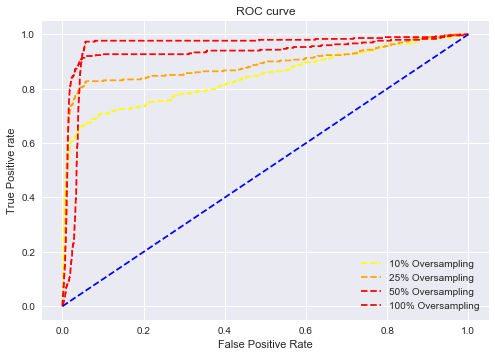

10% auc: 0.8422322121183535
25% auc: 0.888916374586608
50% auc: 0.9385202691502095
100% auc: 0.9498792908751046


In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_proba1 = model10.predict_proba(X).reshape(1, -1)[0]
y_proba2 = model25.predict_proba(X).reshape(1, -1)[0]
y_proba3 = model50.predict_proba(X).reshape(1, -1)[0]
y_proba4 = model100.predict_proba(X).reshape(1, -1)[0]

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y, y_proba1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y, y_proba2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y, y_proba3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y, y_proba4, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y, y_proba1)
auc_score2 = roc_auc_score(y, y_proba2)
auc_score3 = roc_auc_score(y, y_proba3)
auc_score4 = roc_auc_score(y, y_proba4)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='10% Oversampling')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='25% Oversampling')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='50% Oversampling')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='100% Oversampling')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print("10% auc:", auc_score1)
print("25% auc:", auc_score2)
print("50% auc:", auc_score3)
print("100% auc:", auc_score4)